# Importing all the libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reading the Data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [6]:
data .describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [43]:
data.shape

(25, 2)

In [44]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


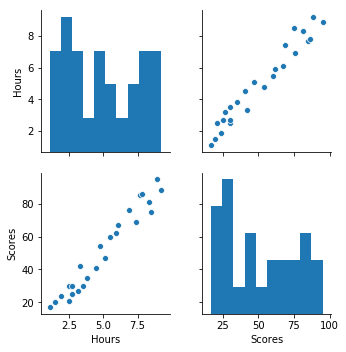

In [7]:
sns.pairplot(data)

Text(0.5, 1.0, 'Scores vs Hours')

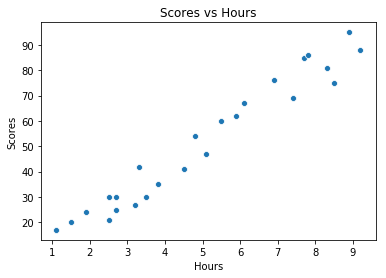

In [8]:
x = data["Hours"]
y = data["Scores"]
sns.scatterplot(x,y)
plt.title("Scores vs Hours")

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


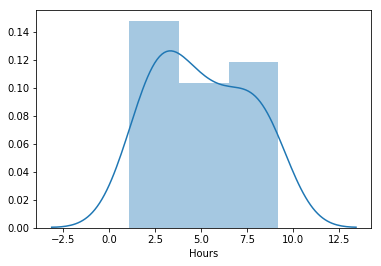

In [11]:
sns.distplot(data['Hours'])

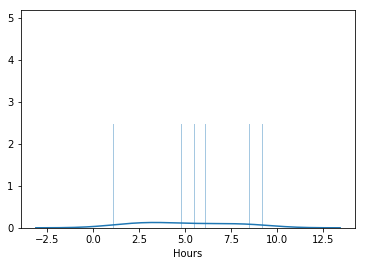

In [13]:
sns.distplot(data['Hours'],bins=500)

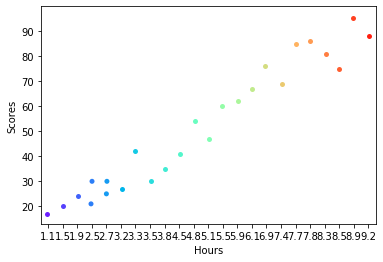

In [47]:
sns.stripplot(x,y,data=data,palette='rainbow')

# Preparing the data

In [48]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [50]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

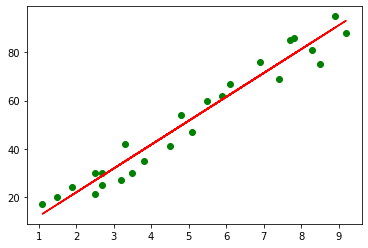

In [51]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, color="green")
plt.plot(X, line,color="red");
plt.show()

# Making Predictions

In [52]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


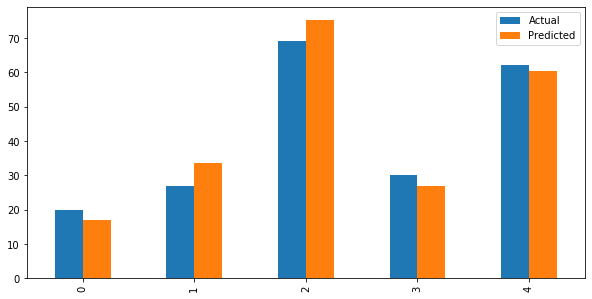

In [54]:
df.plot(kind='bar',figsize=(10,5))

# Making Own Prediction

In [55]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
pred = regressor.predict(hours)
print("No of Hours = " , hours[0][0])
print("Predicted Score = " , pred[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


# Evaluating the Model

In [56]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
